In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

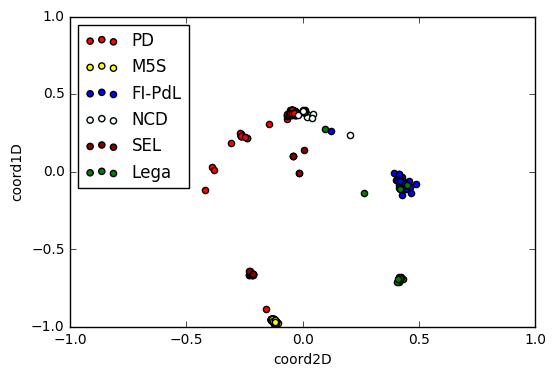

In [213]:
data_pd = pd.read_csv("plot.csv", usecols=(2,13,14))
q = 'party == "PD"'
plt.figure()

ax = data_pd[data_pd.party == "PD"].plot(kind='scatter', y='coord1D',x='coord2D', color='red',label="PD")
data_pd[data_pd.party == "M5S"].plot(kind='scatter', y='coord1D',x='coord2D',ax=ax, color='yellow',label="M5S")
data_pd[data_pd.party == "FI-PdL"].plot(kind='scatter', y='coord1D',x='coord2D',ax=ax, color='blue',label="FI-PdL")
data_pd[data_pd.party == "AP-NCD-CPI"].plot(kind='scatter', y='coord1D',x='coord2D',ax=ax, color='azure',label="NCD")
data_pd[data_pd.party == "SI-SEL"].plot(kind='scatter', y='coord1D',x='coord2D',ax=ax, color='darkred',label="SEL")
data_pd[data_pd.party == "Lega"].plot(kind='scatter', y='coord1D',x='coord2D',ax=ax, color='green',label="Lega")


plt.axis([-1,1,-1,1])
plt.legend(loc='upper left')


#data_pd.query(q)[['coord1D','coord2D']].plot(title=q, kind='scatter', x='coord1D',y='coord2D')
#data_pd.plot(kind='scatter', x='coord1D', y='coord2D')